In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.18.2
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


## ternary data

### base

In [2]:
enzyme_base = pd.read_csv('Enzyme_base_20201.csv',index_col=0)
osmolyte_base = pd.read_csv('Osmolyte_base_20201.csv',index_col=0)
yield_base = pd.read_csv('Yield_base_20201.csv',index_col=0)
yield_base[yield_base < 0] = 0

### basex4

In [3]:
enzyme_basex4 = pd.read_csv('Enzyme_basex4_20201.csv',index_col=0)
osmolyte_basex4 = pd.read_csv('Osmolyte_basex4_20201.csv',index_col=0)
yield_basex4 = pd.read_csv('Yield_basex4_20201.csv',index_col=0)
yield_basex4[yield_basex4 < 0] = 0

### basex10

In [4]:
enzyme_basex10 = pd.read_csv('Enzyme_basex10_20201.csv',index_col=0)
osmolyte_basex10 = pd.read_csv('Osmolyte_basex10_20201.csv',index_col=0)
yield_basex10 = pd.read_csv('Yield_basex10_20201.csv',index_col=0)
yield_basex10[yield_basex10 < 0] = 0

In [5]:
def community_data(osmolyte,Yield, enzyme):
    """
    Derive community level YAS data.
    
    Parameters:
      -enzyme:
      -osmolyte
      -Yield
    Return:
      -community_alive:
    """
    community = pd.concat([osmolyte.sum(axis=0),Yield.sum(axis=0),enzyme.sum(axis=0)],axis=1,sort=False)
    community.columns = ['Osmolyte', 'Yield','Enzyme']
    total = community.sum(axis=1)
    community_alive = 100*community[total>0].divide(total[total>0],axis=0)
    
    return community_alive

## YAS order

In [6]:
community_base    = community_data(osmolyte_base, yield_base, enzyme_base)
community_basex4  = community_data(osmolyte_basex4, yield_basex4, enzyme_basex4)
community_basex10 = community_data(osmolyte_basex10,yield_basex10, enzyme_basex10)

In [7]:
community_base.head()

,Osmolyte,Yield,Enzyme
1,0.045723,0.000000,99.954277
2,0.045912,0.000000,99.954088
3,0.045991,0.000000,99.954009
4,0.045963,0.000000,99.954037
5,0.043855,4.468748,95.487398


In [8]:
community_base.shape

(3650, 3)

## year-3

`version_1`

In [9]:
community_base_y3 = community_base.iloc[365*3-365:365*3-0,:]
community_base_y3.head()

,Enzyme,Osmolyte,Yield
731,99.909665,0.090335,0.0
732,99.909472,0.090528,0.0
733,99.909366,0.090634,0.0
734,99.909582,0.090418,0.0
735,99.909832,0.090168,0.0


In [10]:
community_base_y3 = community_base_y3.loc[community_base_y3['Yield']> 0]
community_base_y3.head()

,Enzyme,Osmolyte,Yield
736,97.754869,0.087905,2.157226
737,90.889433,0.081384,9.029183
738,65.448615,0.058236,34.493149
739,58.194689,0.051525,41.753786
740,42.333976,0.037122,57.628902


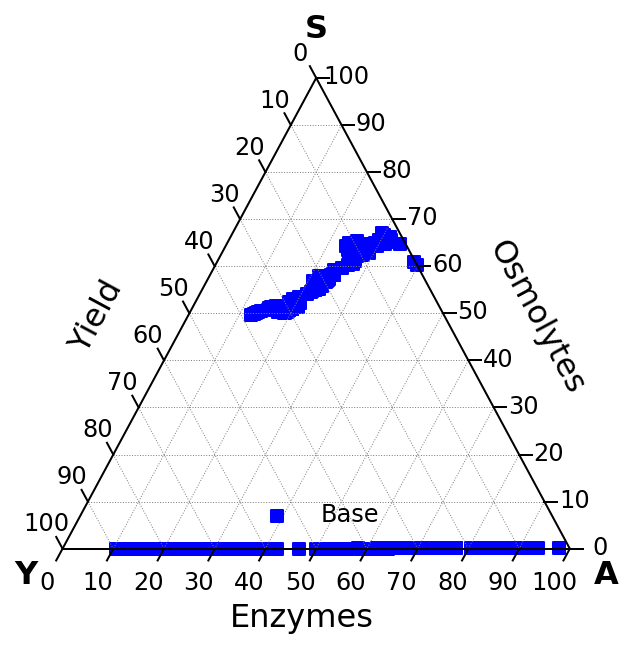

In [11]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(community_base_y3.values,   marker='s',color='blue',   label="Base",alpha=1.0)

#tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='dodgerblue',label="Pre-DS",         alpha=1.0)
#tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='dodgerblue',label="Post-DS",        alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

`version_2`

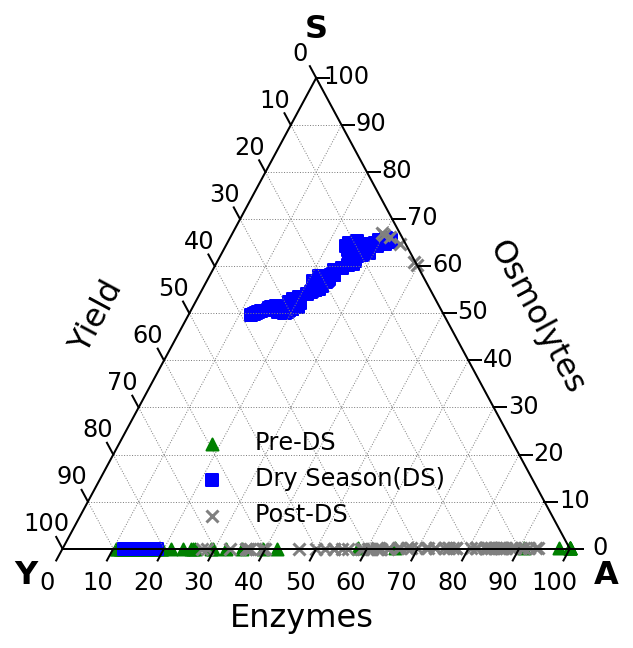

In [12]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

#tax.scatter(community_base.iloc[365*3-365:365*3-0,:].values,   marker='s',color='blue',   label="Base",alpha=1.0)
tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='green',label="Pre-DS", alpha=1.0)
tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)


#tax.scatter(community_basex4.iloc[365*3-365:365*3-0,:].values, marker='s',color='orange', label="Base",alpha=1.0)
#tax.scatter(community_basex10.iloc[365*3-365:365*3-0,:].values,marker='s',color='red',    label="Base",alpha=0.5)

tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

`version_3`

In [9]:
base    = pd.read_csv('forcing/base_forcing.csv', index_col=0)
basex4  = pd.read_csv('forcing/basex4_forcing.csv', index_col=0)
basex10 = pd.read_csv('forcing/basex10_forcing.csv', index_col=0)

base.head()

,Temp,FM,Psi,Date
0,10.823177,51.092615,-0.699744,2010-12-15
1,11.276333,59.277813,-0.590705,2010-12-16
2,9.696135,65.896792,-0.523555,2010-12-17
3,12.626583,69.708313,-0.491047,2010-12-18
4,12.442771,70.763521,-0.482708,2010-12-19


In [14]:
community_base.head()

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.954088,0.045912,0.000000
3,99.954009,0.045991,0.000000
4,99.954037,0.045963,0.000000
5,95.487398,0.043855,4.468748


In [15]:
def generate_heatmap_data(community,water_potential):
    
    
    community_t = community.copy()
    community_t['Psi'] = water_potential.loc[:,'Psi'].tolist()
    
    d = dict()
    for (i, j, y, p) in community_t.values:
        d[(i, j)] = p
    return d

In [16]:
def generate_heatmap_data(community,water_potential):
    
    
    community_t = community.copy()
    community_t['Psi'] = abs(water_potential.loc[:,'Psi']).tolist()
    
    d = dict()
    for (i, j, y, p) in community_t.values:
        d[(i, j)] = p
    return d

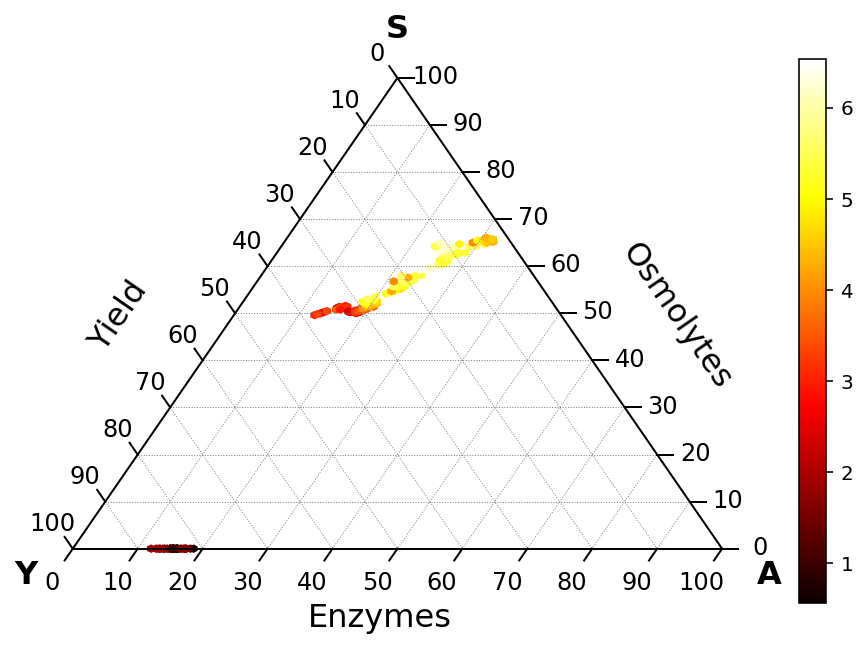

In [17]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,5)

#tax.scatter(community_base.iloc[365*3-365:365*3-0,:].values,   marker='s',color='blue',   label="Base",alpha=1.0)
#tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='green',label="Pre-DS", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)

tax.heatmap(generate_heatmap_data(community_base.iloc[365*3-257:365*3-75,:], base.iloc[365*3-257:365*3-75,:]), style="hexagonal", cmap='hot',colorbar=True)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## year-6

In [10]:
community_base_y6    = community_base.iloc[365*6-257:365*6-75,:]
community_basex4_y6  = community_basex4.iloc[365*6-257:365*6-75,:]
community_basex10_y6 = community_basex10.iloc[365*6-257:365*6-75,:]

community_base_y6    = community_base_y6.loc[community_base_y6['Yield']> 0]
community_basex4_y6  = community_basex4_y6.loc[community_basex4_y6['Yield']> 0]
community_basex10_y6 = community_basex10_y6.loc[community_basex10_y6['Yield']> 0]

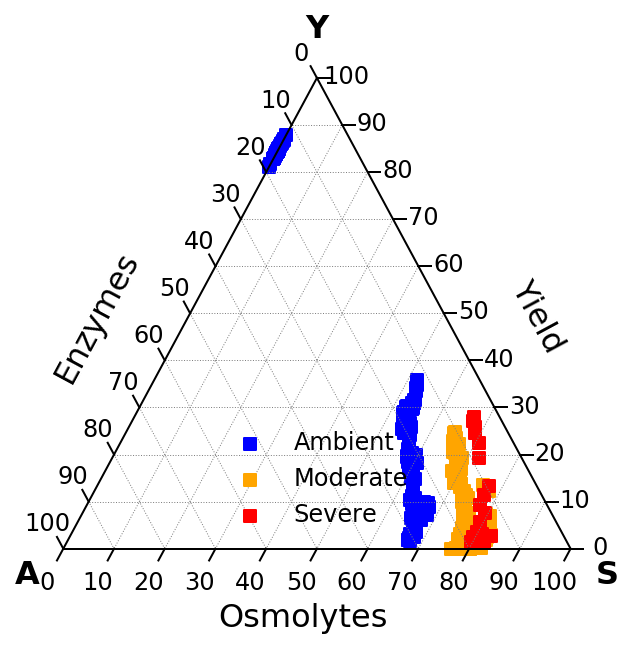

In [14]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


tax.scatter(community_base_y6.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex4_y6.values, marker='s',color='orange', label="Moderate",alpha=1.0)
tax.scatter(community_basex10_y6.values,marker='s',color='red',    label="Severe",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

tax.savefig('../figures/ternary_supp_y6.svg')

tax.show()

In [12]:
community_base_t = community_base.iloc[365*6-257:365*6-75,:].copy()
community_base_t['Psi'] = abs(base.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_basex4_t = community_basex4.iloc[365*6-257:365*6-75,:].copy()
community_basex4_t['Psi'] = abs(basex4.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_basex10_t = community_basex10.iloc[365*6-257:365*6-75,:].copy()
community_basex10_t['Psi'] = abs(basex10.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_year6 = pd.concat([community_base_t, community_basex4_t, community_basex10_t])

community_year6 = community_year6[community_year6['Yield'] > 0]

community_y6 = dict()
for (i, j, y, p) in community_year6.values:
    community_y6[(i, j)] = p

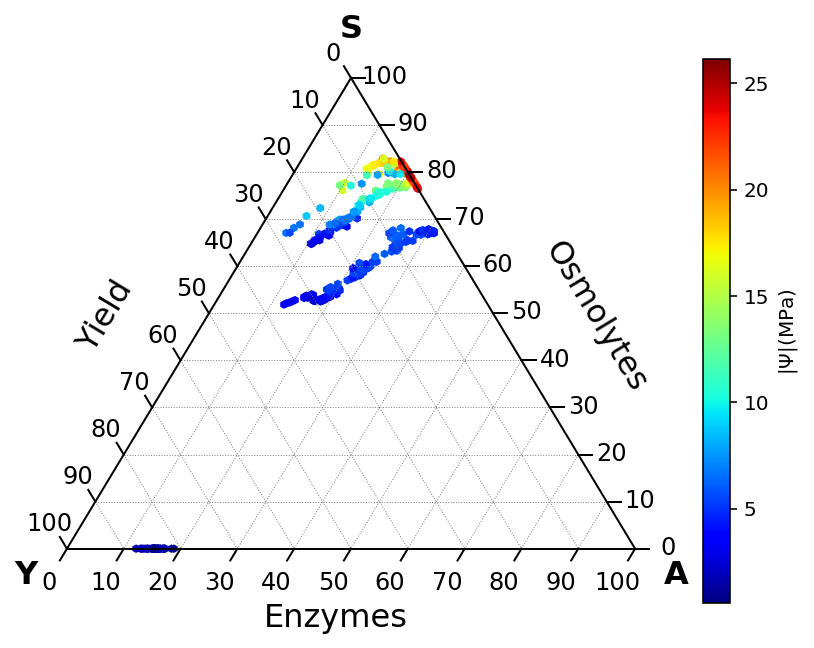

In [36]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


tax.heatmap(community_y6, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')


tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y6.pdf',dpi=500)

tax.show()

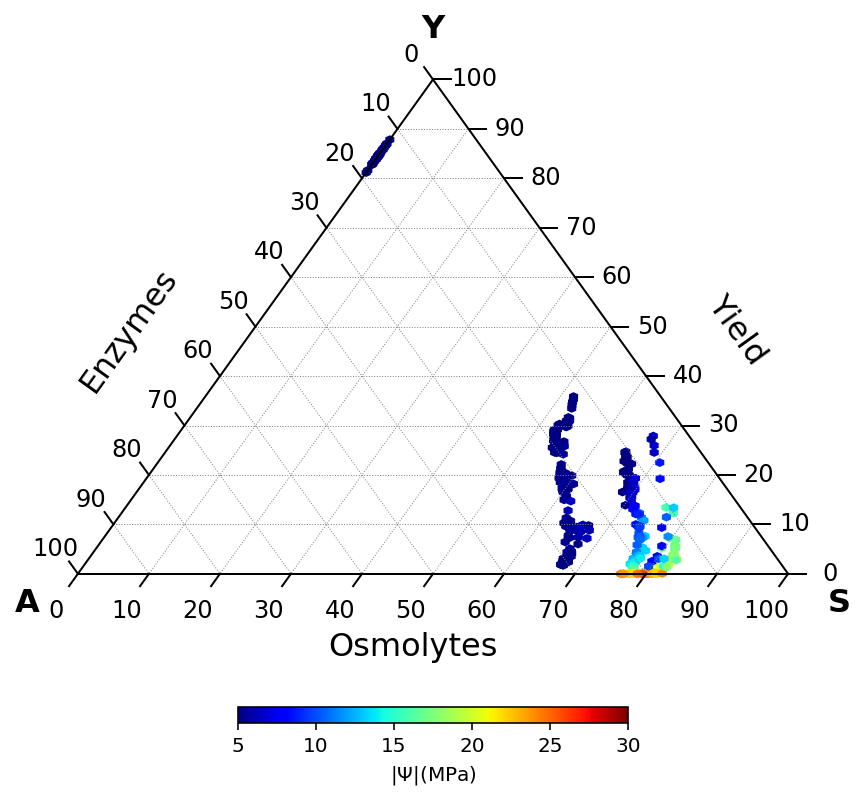

In [23]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

cb_kwargs = {"shrink" : 0.5,
             "orientation" : "horizontal",
             "fraction" : 0.15,
             "pad" : 0.10,
             "aspect" : 25}

tax.heatmap(community_y6,vmin=5.0,vmax=30.0,
            style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)',cb_kwargs=cb_kwargs)


tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

tax.savefig('../figures/ternary_y6.svg')

tax.show()

## year-9

In [12]:
community_base_y9    = community_base.iloc[365*9-257:365*9-75,:]
community_basex4_y9  = community_basex4.iloc[365*9-257:365*9-75,:]
community_basex10_y9 = community_basex10.iloc[365*9-257:365*9-75,:]

community_base_y9    = community_base_y9.loc[community_base_y9['Yield']> 0]
community_basex4_y9  = community_basex4_y9.loc[community_basex4_y9['Yield']> 0]
community_basex10_y9 = community_basex10_y9.loc[community_basex10_y9['Yield']> 0]

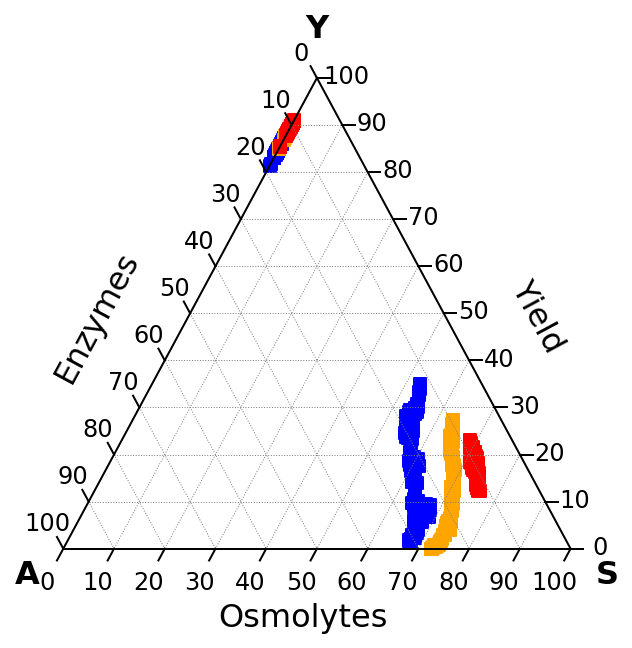

In [13]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


tax.scatter(community_base_y9.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex4_y9.values, marker='s',color='orange', label="Moderate",alpha=1.0)
tax.scatter(community_basex10_y9.values,marker='s',color='red',    label="Severe",alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_supp_y9.svg')

tax.show()

In [18]:
community_base_t = community_base.iloc[365*9-257:365*9-75,:].copy()
community_base_t['Psi'] = abs(base.iloc[365*9-257:365*9-75,:].loc[:,'Psi']).tolist()

community_basex4_t = community_basex4.iloc[365*9-257:365*9-75,:].copy()
community_basex4_t['Psi'] = abs(basex4.iloc[365*9-257:365*9-75,:].loc[:,'Psi']).tolist()

community_basex10_t = community_basex10.iloc[365*9-257:365*9-75,:].copy()
community_basex10_t['Psi'] = abs(basex10.iloc[365*9-257:365*9-75,:].loc[:,'Psi']).tolist()

community_year9 = pd.concat([community_base_t, community_basex4_t, community_basex10_t])

community_year9 = community_year9[community_year9['Yield'] > 0]

community_y9 = dict()
for (i, j, y, p) in community_year9.values:
    community_y9[(i, j)] = p

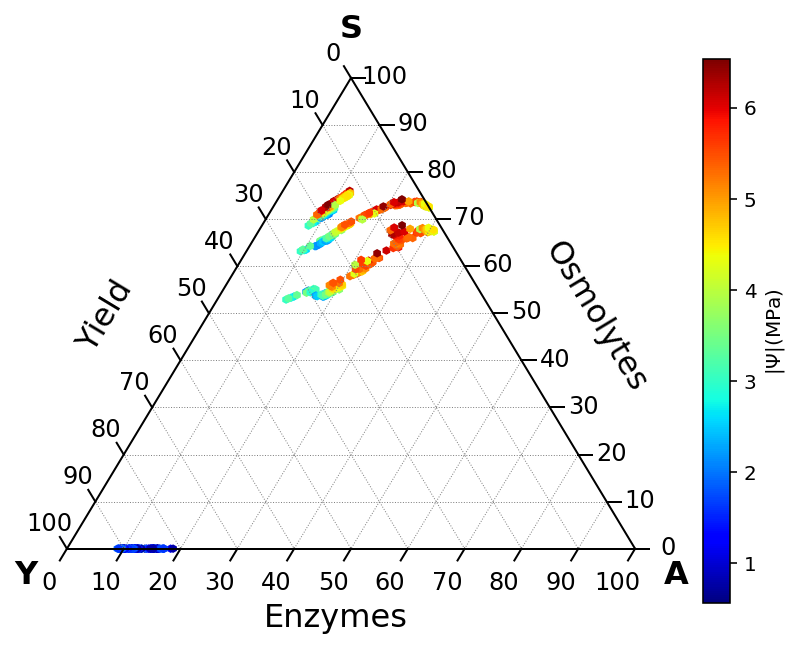

In [35]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)

tax.heatmap(community_y9, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')


tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y9.pdf',dpi=500)

tax.show()

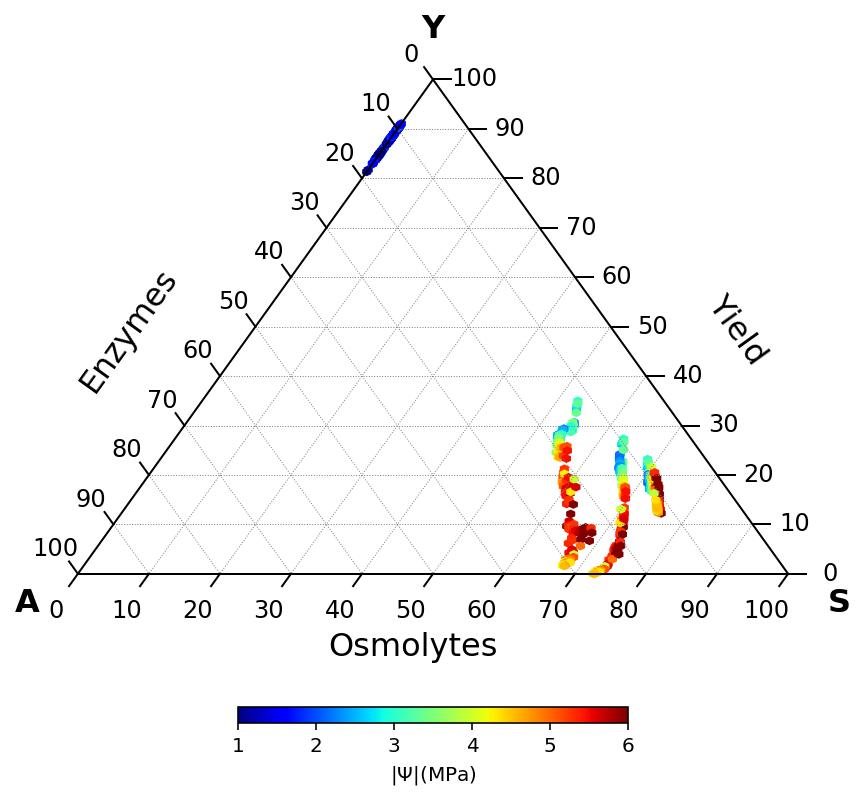

In [24]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

cb_kwargs = {"shrink" : 0.5,
             "orientation" : "horizontal",
             "fraction" : 0.15,
             "pad" : 0.10,
             "aspect" : 25}

tax.heatmap(community_y9, vmin=1.0, vmax=6.0,
            style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)',cb_kwargs=cb_kwargs)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

tax.savefig('../figures/ternary_y9.svg')

tax.show()